In [2]:
import glob
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from pretrained_models.inceptionv3net import InceptionV3Net
# from pretrained_models.vgg16net import VGG16Net
# from pretrained_models.xceptionnet import XceptionNet
# from pretrained_models.resnet50net import ResNet50Net
from pypackage.classifier import Classifier
# from pypackage.preprocessor import Preprocessor
# from pypackage.feature_extractor import FeatureExtractor
import tensorflow as tf

2023-02-02 21:30:29.300746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load Fused Feature

In [21]:
train_ft = np.load("Extracted/fusedtrain.npy")

In [22]:
test_ft = np.load("Extracted/fusedtest.npy")

### Load Labels

In [21]:
y_train = np.load("Extracted/train_labels.npy")

In [21]:
test_labels = np.load("Extracted/test_labels.npy")

### Naive Bayes classifier

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)

In [26]:
# Prediction from Naive Bayes classifier
pred_NB = Classifier.NB(train_ft, test_ft, y_train)

# Inverse le transform to get original label back.
pred_NB = le.inverse_transform(pred_NB)
np.save("pred_NB", pred_NB)

# Print accuracy, precision, fscore

NB_Accuracy = accuracy_score(test_labels, pred_NB)
NB_Precision = precision_score(test_labels, pred_NB, average='weighted')
NB_Fscore = f1_score(test_labels, pred_NB, average='weighted')

print("NB_Accuracy = ", NB_Accuracy, "NB_Precision = ", NB_Precision, "NB_Fscore = ", NB_Fscore)

NB_Accuracy =  0.6573226544622426 NB_Precision =  0.7056342988095363 NB_Fscore =  0.662301260259239


In [27]:
print(classification_report(test_labels, pred_NB))

              precision    recall  f1-score   support

      glioma       0.49      0.82      0.62      1200
  meningioma       0.64      0.48      0.55      1224
    no_tumor       0.93      0.65      0.77      1620
   pituitary       0.69      0.68      0.68      1200

    accuracy                           0.66      5244
   macro avg       0.69      0.66      0.65      5244
weighted avg       0.71      0.66      0.66      5244



[[ 985  103   26   86]
 [ 466  586   49  123]
 [ 230  173 1061  156]
 [ 317   59    9  815]]


<AxesSubplot:>

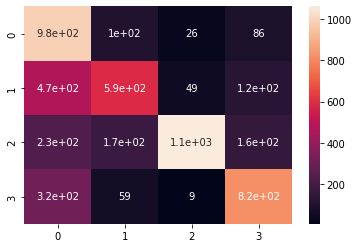

In [28]:
# Confusion Matrix - verify accuracy of each class

cm = confusion_matrix(test_labels, pred_NB)
print(cm)
sns.heatmap(cm, annot=True)